In [1]:
import pandas as pd
import numpy as np
!pip install yfinance
import yfinance as yf
!pip install pandas_ta
import pandas_ta as ta
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=06e7dcf2977231677f5744b1fac6be9cb32bd8d02df5ec915a4ba2d8fbecdce0
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
dlf=yf.Ticker("DLF.NS")
dlf.history(period="1y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-21 00:00:00+05:30,364.126077,364.126077,353.212216,354.700470,2119153,0.0,0.0
2023-02-22 00:00:00+05:30,353.113001,353.410670,344.332298,345.870178,3326607,0.0,0.0
2023-02-23 00:00:00+05:30,346.267020,346.812701,338.627306,340.214783,4026752,0.0,0.0
2023-02-24 00:00:00+05:30,344.282691,348.549006,342.298353,343.340118,2887310,0.0,0.0
2023-02-27 00:00:00+05:30,344.679545,348.648222,339.718700,347.209595,3701975,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-15 00:00:00+05:30,848.000000,857.950012,842.500000,851.400024,3505476,0.0,0.0
2024-02-16 00:00:00+05:30,857.000000,869.299988,848.799988,863.299988,3451534,0.0,0.0
2024-02-19 00:00:00+05:30,864.299988,866.700012,845.349976,848.599976,2390450,0.0,0.0


In [3]:
def ema(data,window):
  return data['Close'].ewm(span=window).mean()
def rsi(data):
 delta=data['Close'].diff()
 gain=delta.where(delta>0,0)
 loss=-delta.where(delta<0,0)
 avg_gain=gain.rolling(window=14).mean()
 avg_loss=loss.rolling(window=14).mean()
 rs=avg_gain/avg_loss
 rsi=100-(100/(1+rs))
 return rsi
def signals(data,ema_window,RSIhigh,RSIlow):
  signals=pd.DataFrame(index=data.index)
  signals['EMA']=ema(data,ema_window)
  signals['RSI']=rsi(data)
  signals['Signal'] = 0
  signals['Signal'][signals['EMA'] > data['Close']] = 1  # Buy signal
  signals['Signal'][signals['EMA'] < data['Close']] = -1  # Sell signal
  signals['Signal'][(signals['RSI'] > RSIhigh) & (signals['Signal'] == 1)] = 0
  signals['Signal'][(signals['RSI'] < RSIlow) & (signals['Signal'] == -1)] = 0
  return(signals)



In [4]:
data=dlf.history(period="4y")
ema_window=12
RSIhigh=70
RSIlow=30
signals=signals(data,ema_window,RSIhigh,RSIlow)
print(signals)







                                  EMA        RSI  Signal
Date                                                    
2020-02-24 00:00:00+05:30  206.768005        NaN       0
2020-02-25 00:00:00+05:30  209.007984        NaN      -1
2020-02-26 00:00:00+05:30  208.114728        NaN       1
2020-02-27 00:00:00+05:30  206.522466        NaN       1
2020-02-28 00:00:00+05:30  203.734002        NaN       1
...                               ...        ...     ...
2024-02-15 00:00:00+05:30  818.713782  76.002229      -1
2024-02-16 00:00:00+05:30  825.573198  76.425215      -1
2024-02-19 00:00:00+05:30  829.115779  67.458949      -1
2024-02-20 00:00:00+05:30  834.467202  67.385136      -1
2024-02-21 00:00:00+05:30  842.526090  72.064039      -1

[991 rows x 3 columns]


<ipython-input-3-684e30b044ba>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['Signal'][signals['EMA'] > data['Close']] = 1  # Buy signal
<ipython-input-3-684e30b044ba>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['Signal'][signals['EMA'] < data['Close']] = -1  # Sell signal
<ipython-input-3-684e30b044ba>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['Signal'][(signals['RSI'] > RSIhigh) & (signals['S

In [5]:
def backtest(data,signals,initial_capital=100001,compound=True):
    positions = pd.DataFrame(index=data.index)
    positions['Position'] = signals['Signal']
    positions['Stock'] = 50 * positions['Position'] #Buying 50 shares
    portfolio = positions.multiply(data['Close'], axis=0)
    pos_diff = positions.diff()
    portfolio['Cash'] = initial_capital - (pos_diff['Stock'] * data['Close']).cumsum()
    portfolio['Total'] = portfolio['Stock'] + portfolio['Cash']
    portfolio['Returns'] = portfolio['Total'].pct_change()
    if compound:
        portfolio['Returns'] = (1 + portfolio['Returns']).cumprod() - 1
    return portfolio
portfolio=backtest(data,signals)
print(portfolio)

                             Position         Stock           Cash  \
Date                                                                 
2020-02-24 00:00:00+05:30    0.000000      0.000000            NaN   
2020-02-25 00:00:00+05:30 -210.903351 -10545.167542  110546.167542   
2020-02-26 00:00:00+05:30  206.719345  10335.967255   89874.233032   
2020-02-27 00:00:00+05:30  203.070511  10153.525543   89874.233032   
2020-02-28 00:00:00+05:30  196.259308   9812.965393   89874.233032   
...                               ...           ...            ...   
2024-02-15 00:00:00+05:30 -851.400024 -42570.001221  124595.995117   
2024-02-16 00:00:00+05:30 -863.299988 -43164.999390  124595.995117   
2024-02-19 00:00:00+05:30 -848.599976 -42429.998779  124595.995117   
2024-02-20 00:00:00+05:30 -863.900024 -43195.001221  124595.995117   
2024-02-21 00:00:00+05:30 -886.849976 -44342.498779  124595.995117   

                                   Total   Returns  
Date                                

<Axes: title={'center': 'Equity Curve'}, xlabel='Date'>

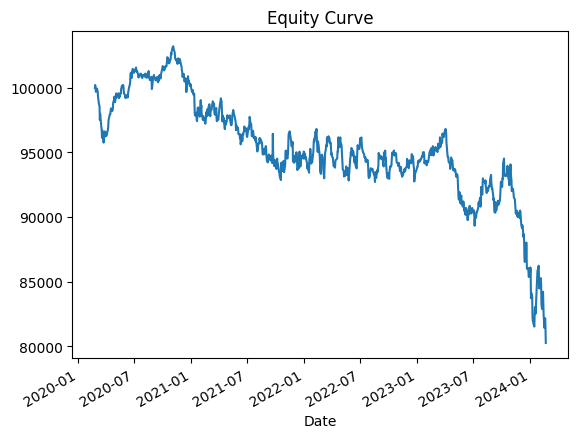

In [6]:
portfolio['Total'].plot(title="Equity Curve")

<Axes: title={'center': 'Drawdown chart'}, xlabel='Date'>

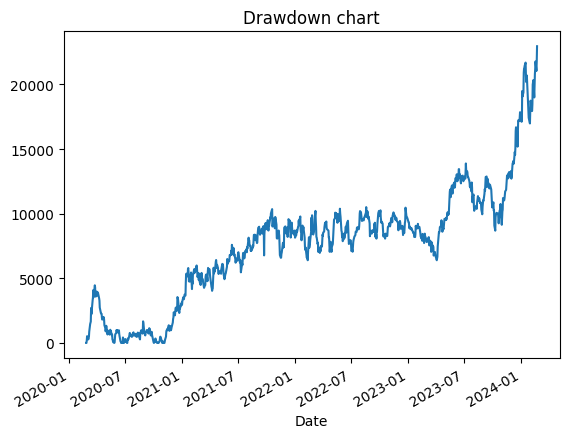

In [7]:
(portfolio['Total'].cummax()-portfolio['Total']).plot(title="Drawdown chart")

<Axes: title={'center': 'Volatility Chart'}, xlabel='Date'>

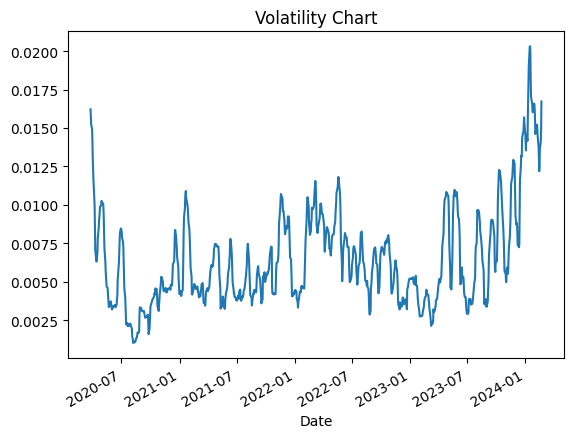

In [8]:
(portfolio['Returns'].rolling(window=20).std()).plot(title="Volatility Chart")

In [9]:
avg_return=portfolio['Returns'].mean()
stdev_return=portfolio['Returns'].std()
R=0.06
sharpe=(avg_return-R)/stdev_return
print(sharpe)

-2.6861861501590827
